In [1]:
import numpy as np
from numpy import pi, r_
from PIL import Image
import imageio
import statistics
from __future__ import print_function
import datetime
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

# Functions

In [2]:
def gauss(x, H, A, x0, sigma):
    """ Calculate the probabilty density function (gauss_2d).
    x0 = expected value
    sigma = standart deviation
    A = height of the curve's peak
    """
    return  A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y); sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    
    fwhm = 2.355 * popt[3] # 2.355 * sigma #FWHM =>sqrt(8*ln2)*sigma
    
    popt = np.append(popt, fwhm) # include FWHM in the output
    
    return popt

# Beam Before BS (07/03)

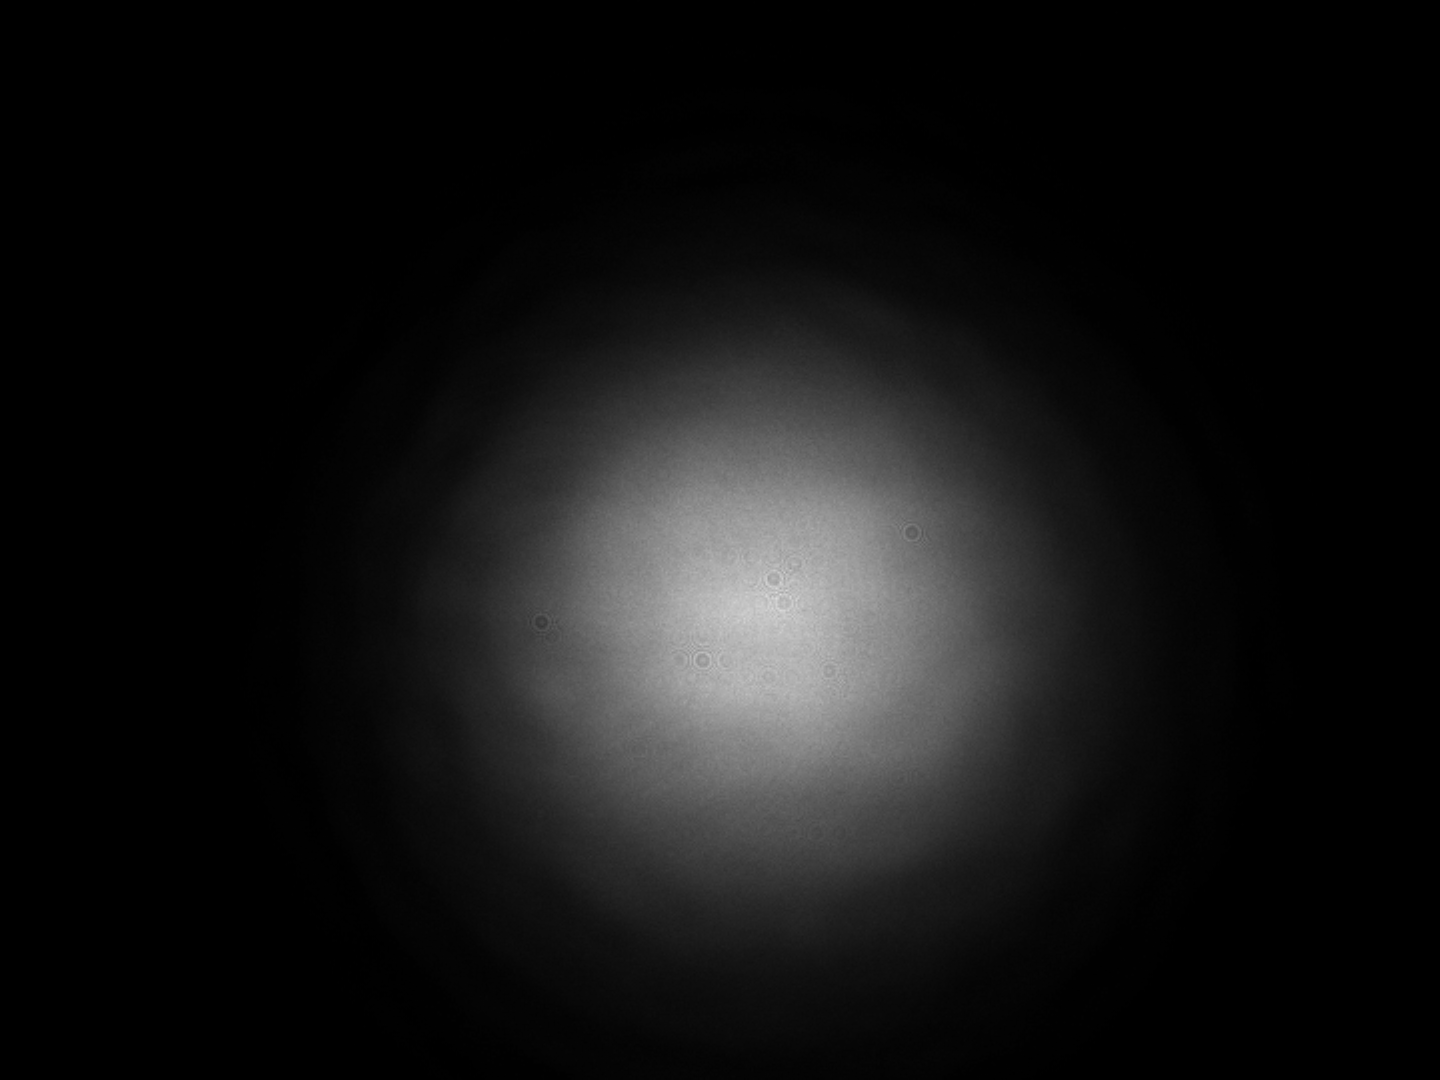

In [3]:
before_bs_r_data  = np.loadtxt("7ms_632nm_before_bs013_r.txt")

before_bs_r = np.array(before_bs_r_data ,dtype="uint8")

Image.fromarray(before_bs_r,mode="L")




Text(0.5, 1.0, 'Intensity x(axis)')

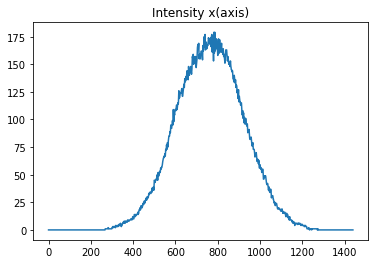

In [4]:
axis_num=550

plt.plot(before_bs_r_data[axis_num])
plt.title("Intensity x(axis)")



In [5]:
#x axis
before_bs_r_list_x=before_bs_r_data[axis_num].tolist()

y_range_um = np.arange(0, 1440)*3.45



In [6]:
#x axis
H_2, A_2, x0_2, sigma_2, fwhm_2 = gauss_fit(y_range_um, before_bs_r_list_x)

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


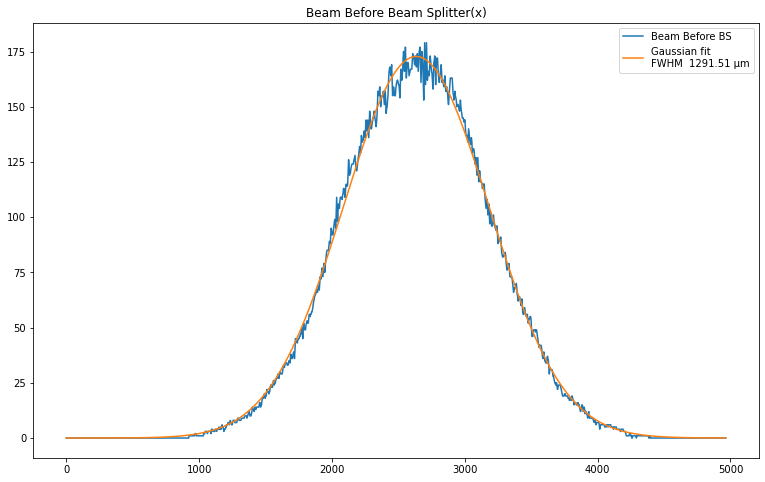

In [7]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,before_bs_r_data[axis_num], label="Beam Before BS  ")
plt.plot(y_range_um, gauss(y_range_um, H_2, A_2, x0_2, sigma_2),  label='Gaussian fit\nFWHM  %.2f μm' %fwhm_2)

plt.title('Beam Before Beam Splitter(x)')
plt.legend()

# Focus at Camera

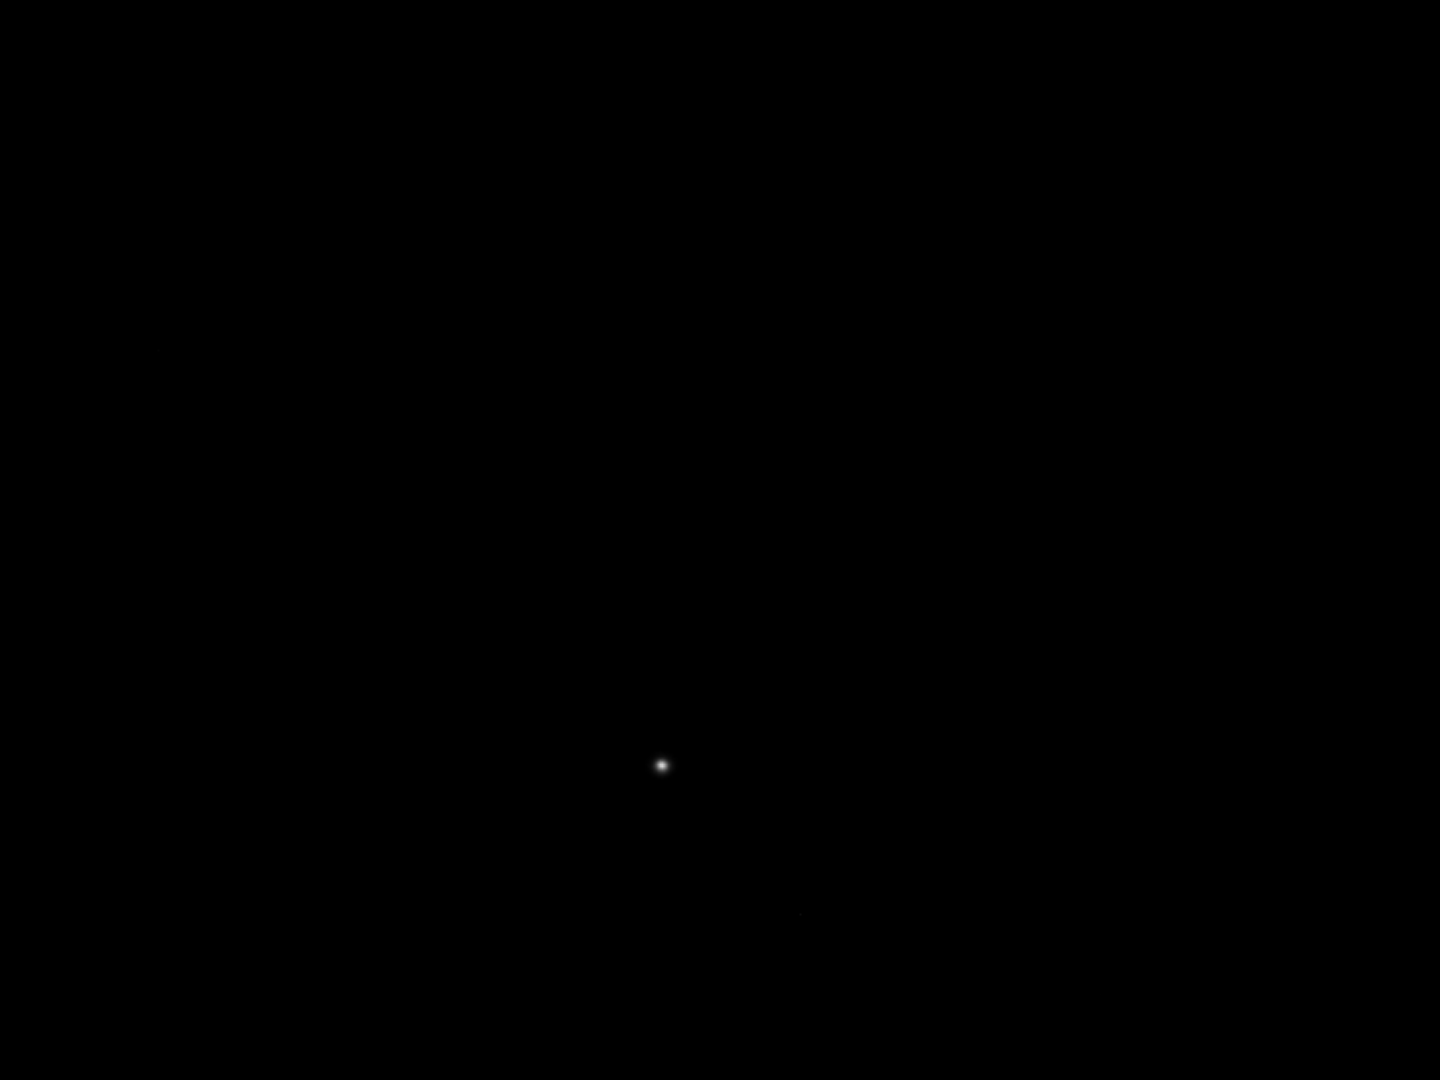

In [20]:

camera_z__2 = np.loadtxt("1_5ms_632nm_camera_200mm_z_-2_r.txt")
camera_z__1 = np.loadtxt("1_5ms_632nm_camera_200mm_z_-1_r.txt")
camera_z_0 = np.loadtxt("1_5ms_632nm_camera_200mm_z_0_r.txt")
camera_z_1 = np.loadtxt("1_5ms_632nm_camera_200mm_z_1_r.txt")
camera_z_2 = np.loadtxt("1_5ms_632nm_camera_200mm_z_2_r.txt")

camera_mirror = np.loadtxt("15ms_632nm_with_mirror_camera_200mm_2_r.txt")

camera_z_0_img = np.array(camera_z_0 ,dtype="uint8")

Image.fromarray(camera_z_0_img,mode="L")




In [21]:
np.where(camera_z_2 == camera_z_2.max())


(array([768]), array([660]))

In [22]:
np.where(camera_mirror== camera_mirror.max())


(array([166]), array([690]))

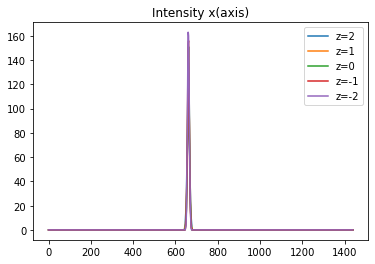

In [10]:
axis_num=768


plt.plot(camera_z_2[axis_num],label="z=2")
plt.plot(camera_z_1[axis_num],label="z=1")
plt.plot(camera_z_0[axis_num],label="z=0")
plt.plot(camera_z__1[axis_num],label="z=-1")
plt.plot(camera_z__2[axis_num],label="z=-2")
plt.title("Intensity x(axis)")
plt.legend()



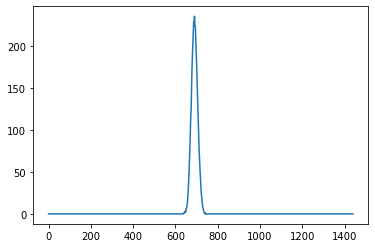

In [23]:
plt.plot(camera_mirror[166],label="mirror")

In [24]:
camera_mirror_list=camera_mirror[166].tolist()

camera_z_2_list=camera_z_2[axis_num].tolist()
camera_z_1_list=camera_z_1[axis_num].tolist()
camera_z_0_list=camera_z_0[axis_num].tolist()
camera_z__1_list=camera_z__1[axis_num].tolist()
camera_z__2_list=camera_z__2[axis_num].tolist()

In [25]:
fwhm_mirror = gauss_fit(y_range_um, camera_mirror_list)[4]

fwhm_z_2 = gauss_fit(y_range_um, camera_z_2_list)[4]
fwhm_z_1 = gauss_fit(y_range_um, camera_z_1_list)[4]
fwhm_z_0 = gauss_fit(y_range_um, camera_z_0_list)[4]
fwhm_z__1 = gauss_fit(y_range_um, camera_z__1_list)[4]
fwhm_z__2 = gauss_fit(y_range_um, camera_z__2_list)[4]

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [26]:
fwhm_z_2,fwhm_z_1,fwhm_z_0,fwhm_z__1,fwhm_z__2,fwhm_mirror

(52.056744404881954,
 43.709652323199286,
 36.67364038065341,
 34.71990386395007,
 35.74115656580951,
 120.10795673489906)

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


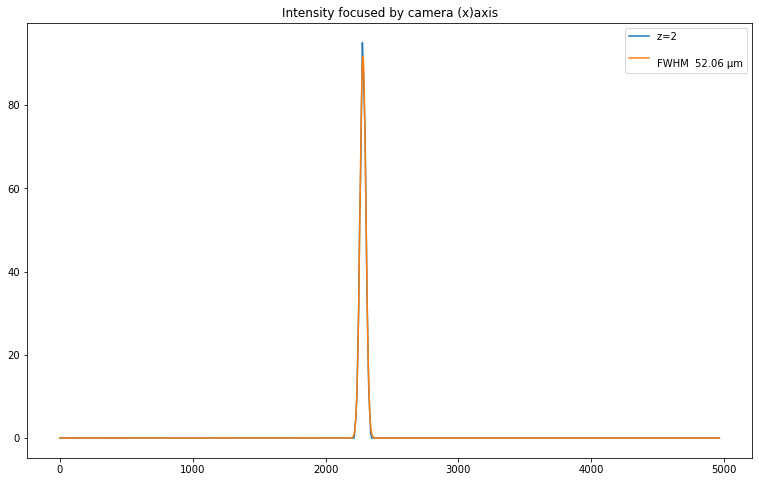

In [29]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_z_2[axis_num], label="z=2  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_z_2_list)[0:4]),  label='\nFWHM  %.2f μm' %fwhm_z_2)

plt.title('Intensity focused by camera (x)axis')
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


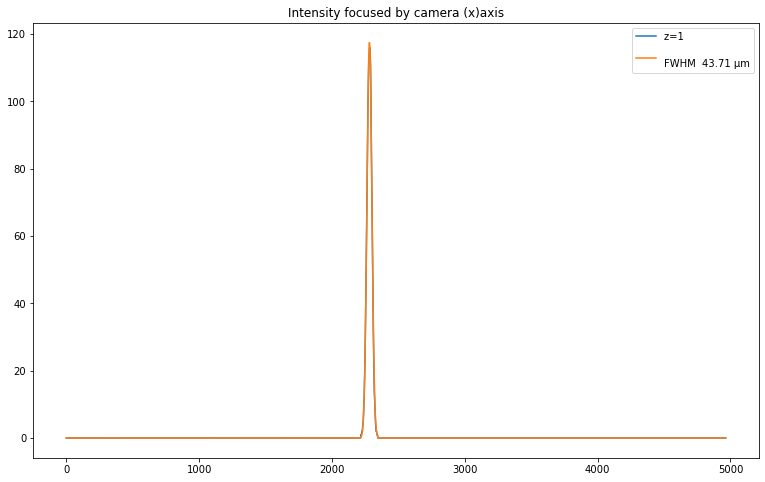

In [30]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_z_1[axis_num], label="z=1  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_z_1_list)[0:4]),  label='\nFWHM  %.2f μm' %fwhm_z_1)

plt.title('Intensity focused by camera (x)axis')
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


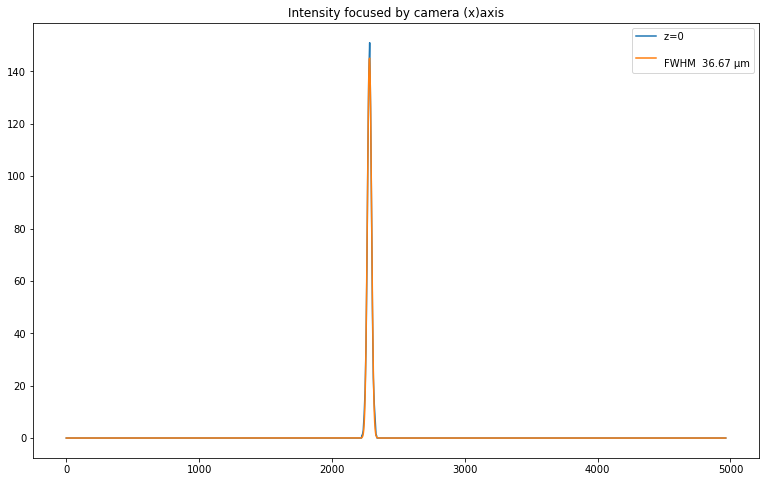

In [40]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_z_0[axis_num], label="z=0  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_z_0_list)[0:4]),  label='\nFWHM  %.2f μm' %fwhm_z_0)

plt.title('Intensity focused by camera (x)axis')
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


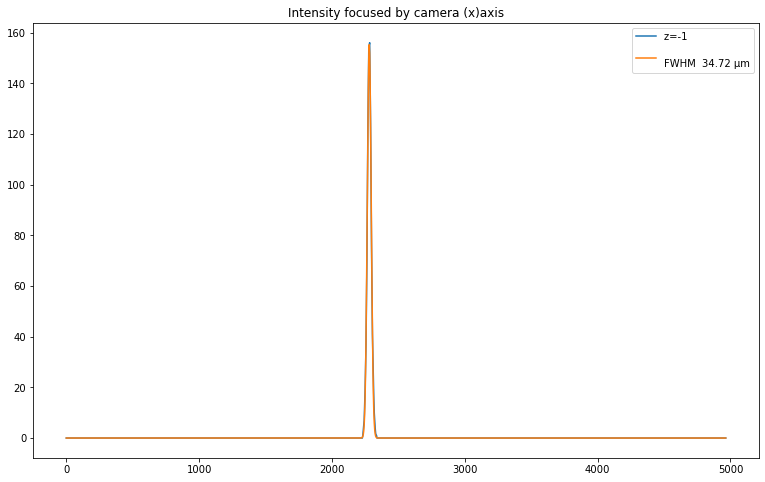

In [32]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_z__1[axis_num], label="z=-1  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_z__1_list)[0:4]),  label='\nFWHM  %.2f μm' %fwhm_z__1)

plt.title('Intensity focused by camera (x)axis')
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


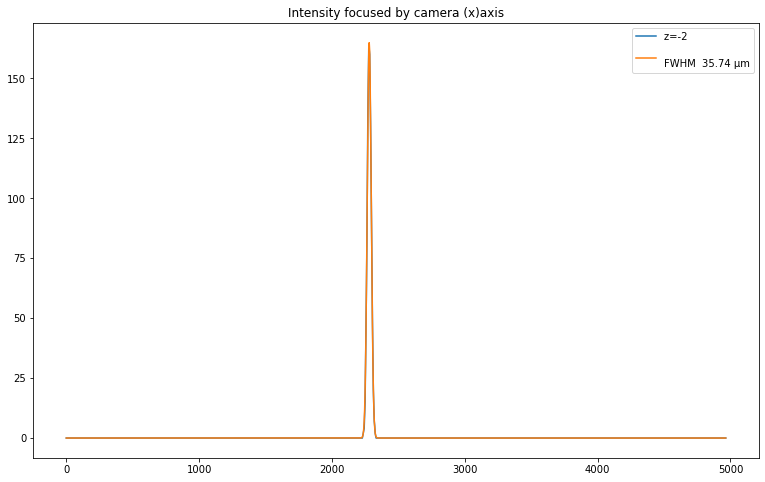

In [33]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_z__2[axis_num], label="z=-2  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_z__2_list)[0:4]),  label='\nFWHM  %.2f μm' %fwhm_z__2)

plt.title('Intensity focused by camera (x)axis')
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


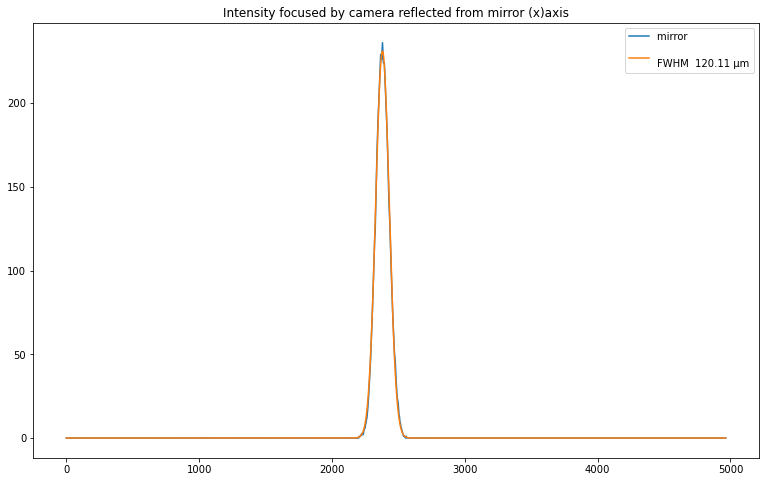

In [41]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_mirror[166], label="mirror  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_mirror_list)[0:4]),  label='\nFWHM  %.2f μm' %fwhm_mirror)

plt.title('Intensity focused by camera reflected from mirror (x)axis')
plt.legend()

# Simulation

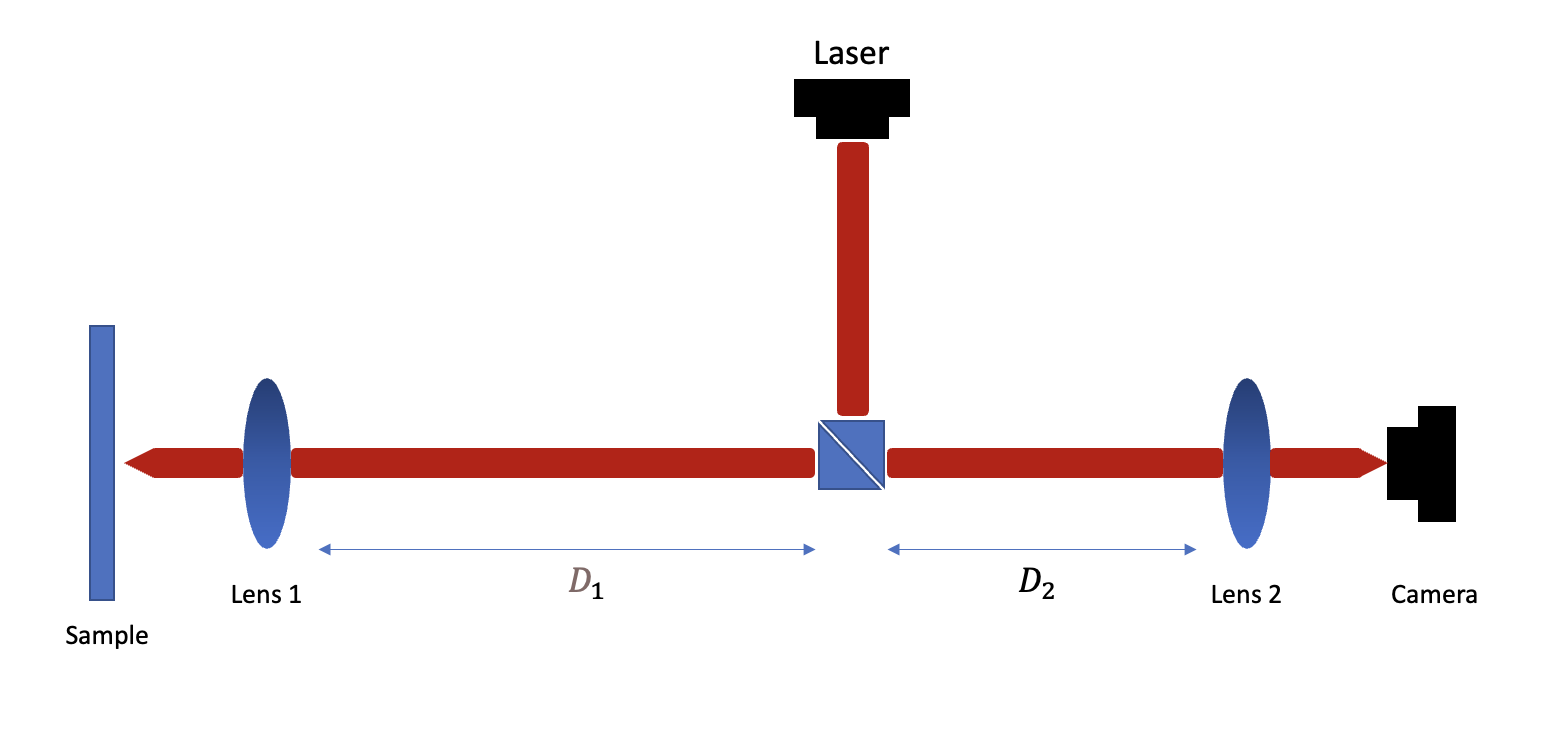

In [42]:
from IPython.display import Image
Image(filename='Optic Path.png') 

In [43]:

from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_drawing import draw_several_fields
from diffractio.utils_optics import beam_width_1D, FWHM1D, MTF_ideal, MTF_parameters
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
import math

number of processors: 8
total memory        : 8.0 Gb
available memory    : 5 %
max frequency       : 2400 GHz
cv2 not imported. Function send_image_screen cannot be used


In [44]:
#Parameters

FWHM_x = 1291 *um

beam_waist = FWHM_x/np.sqrt(2*math.log(2))
beam_diameter = FWHM_x * 1.7 #um

In [45]:
#Sample Size

num_sample=  200000


#Diameter

objective_diameter = 12 * mm
second_lens_diameter = 25.4 * mm

#Focal Length

focal_length_objective = 13.3 * mm 
focal_length_second_lens = 194 * mm


#Range

range_of_second_lens = np.linspace(-second_lens_diameter/2 - 10 * um, second_lens_diameter/2 + 10 * um, num_sample)

#Definition of Sources

wavelength = 0.632 * um

objective = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)
second_lens = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)

objective.lens(x0=0.0, focal=focal_length_objective, radius=objective_diameter/ 2)
second_lens.lens(x0=0.0, focal=focal_length_second_lens, radius=second_lens_diameter/ 2)


#dx um
dx_second_lens= (second_lens_diameter + 20*um)/num_sample
dx_second_lens

0.1271

1291.0000045591132

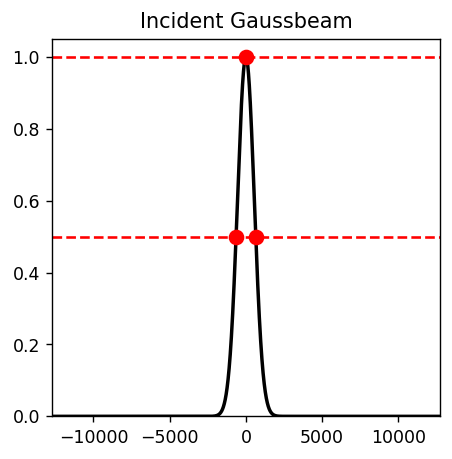

In [46]:
#Incident Beam

incident_gauss_beam = Scalar_source_X(x=range_of_second_lens, wavelength=wavelength)
incident_gauss_beam.gauss_beam(A=1,x0=0,z0=0,w0=beam_waist,theta=0 * degrees) 

fwhm_incident_beam = FWHM1D(incident_gauss_beam.x,incident_gauss_beam.intensity(),has_draw= True)
plt.title("Incident Gaussbeam")
fwhm_incident_beam

In [47]:
incident_beam_just_after_second_lens = incident_gauss_beam * second_lens

In [48]:
shift_in_focal_length_2 = 1* mm
second_lens_focus = incident_beam_just_after_second_lens.RS( z= focal_length_second_lens- shift_in_focal_length_2 ,new_field=True, verbose=True)

Good result: factor 75.64


42.21866559655609

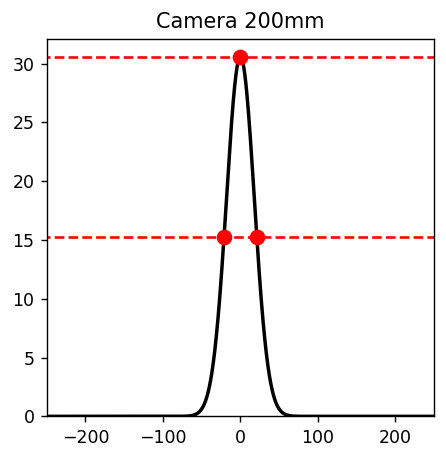

In [49]:
fwhm_cam_200mm = FWHM1D(second_lens_focus.x, np.abs(second_lens_focus.u)**2,has_draw= True)
plt.xlim(-250,250)
plt.title("Camera 200mm")
fwhm_cam_200mm

# Optic Path

In [50]:
u0= incident_gauss_beam * objective


In [59]:
shift_in_focal_length = 0.04*mm
u1= u0.RS(z=focal_length_objective-shift_in_focal_length) 

Good result: factor 7.19


3.2361232422863395

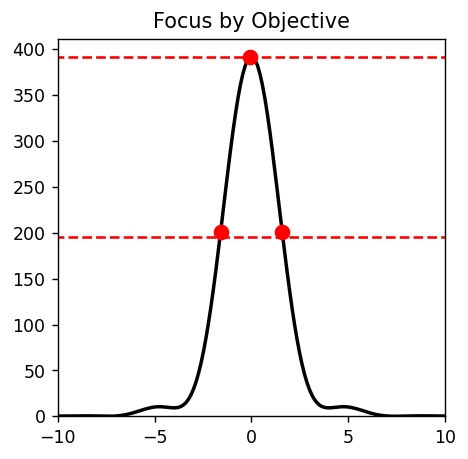

In [89]:
fwhm_objective_focus = FWHM1D(u1.x, np.abs(u1.u)**2,has_draw= True)
plt.xlim(-10,10)
plt.title("Focus by Objective")
fwhm_objective_focus

In [61]:
u2=u0.RS(z=2*(focal_length_objective-shift_in_focal_length)) 
u3= u2 * objective

Good result: factor 11.50


1279.5841479659775

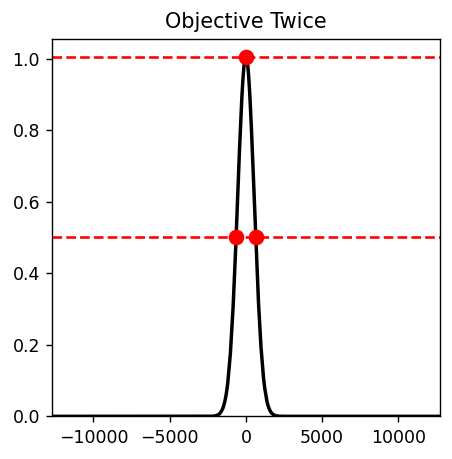

In [62]:
fwhm_objective_twice= FWHM1D(u3.x, np.abs(u3.u)**2,has_draw= True)
plt.title("Objective Twice")
fwhm_objective_twice


In [63]:
fwhm_objective_twice_waist = fwhm_objective_twice/np.sqrt(2*math.log(2))

In [64]:
objective_twice_beam = Scalar_source_X(x=range_of_second_lens, wavelength=wavelength)
objective_twice_beam.gauss_beam(A=1,x0=0,z0=0,w0=fwhm_objective_twice_waist,theta=0 * degrees) 

In [87]:
u4 = objective_twice_beam * second_lens

shift_in_focal_length_3 = 0.94*mm
u5 = u4.RS(z=focal_length_second_lens-shift_in_focal_length_3)

Good result: factor 75.66


42.53050059805719

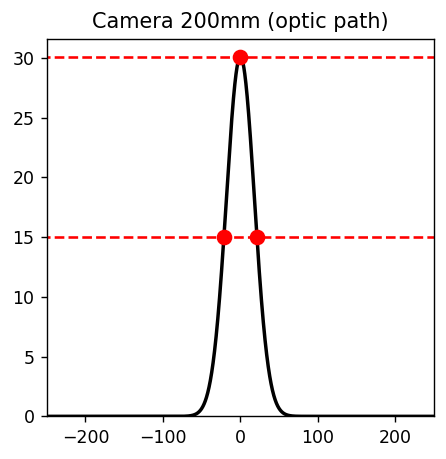

In [88]:
fwhm_camera_optic= FWHM1D(u5.x, np.abs(u5.u)**2,has_draw= True)
plt.title("Camera 200mm (optic path)")
plt.xlim(-250,250)
fwhm_camera_optic
